## Comparison between K-Means Clustering and Gaussian Mixture Model (GMM) on Credit card Customer Segmentation Dataset


About Dataset
This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

CUST_ID : Identification of Credit Card holder (Categorical)
BALANCE : Balance amount left in their account to make purchases (
BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
PURCHASES : Amount of purchases made from account
ONEOFF_PURCHASES : Maximum purchase amount done in one-go
INSTALLMENTS_PURCHASES : Amount of purchase done in installment
CASH_ADVANCE : Cash in advance given by the user
PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
PURCHASES_TRX : Numbe of purchase transactions made
CREDIT_LIMIT : Limit of Credit Card for user
PAYMENTS : Amount of Payment done by user
MINIMUM_PAYMENTS : Minimum amount of payments made by user
PRCFULLPAYMENT : Percent of full payment paid by user
TENURE : Tenure of credit card service for user

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import DataFrame 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv(r"C:\Users\user\OneDrive\Desktop\Datasets\CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.drop('CUST_ID', axis=1, inplace=True)
df.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [4]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [7]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace= True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace= True)
df.tail(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8948,13.457564,0.833333,0.00,0.00,0.0,36.558778,0.000000,0.000000,0.0,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,372.708075,0.666667,1093.25,1093.25,0.0,127.040008,0.666667,0.666667,0.0,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [8]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
cols_int=[i for i in df.columns if df[i].dtype=='int64']
cols_float=[i for i in df.columns if df[i].dtype=='float64']

C:\Users\user\AppData\Local\Temp\ipykernel_788\550828996.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(9,3,i+1)


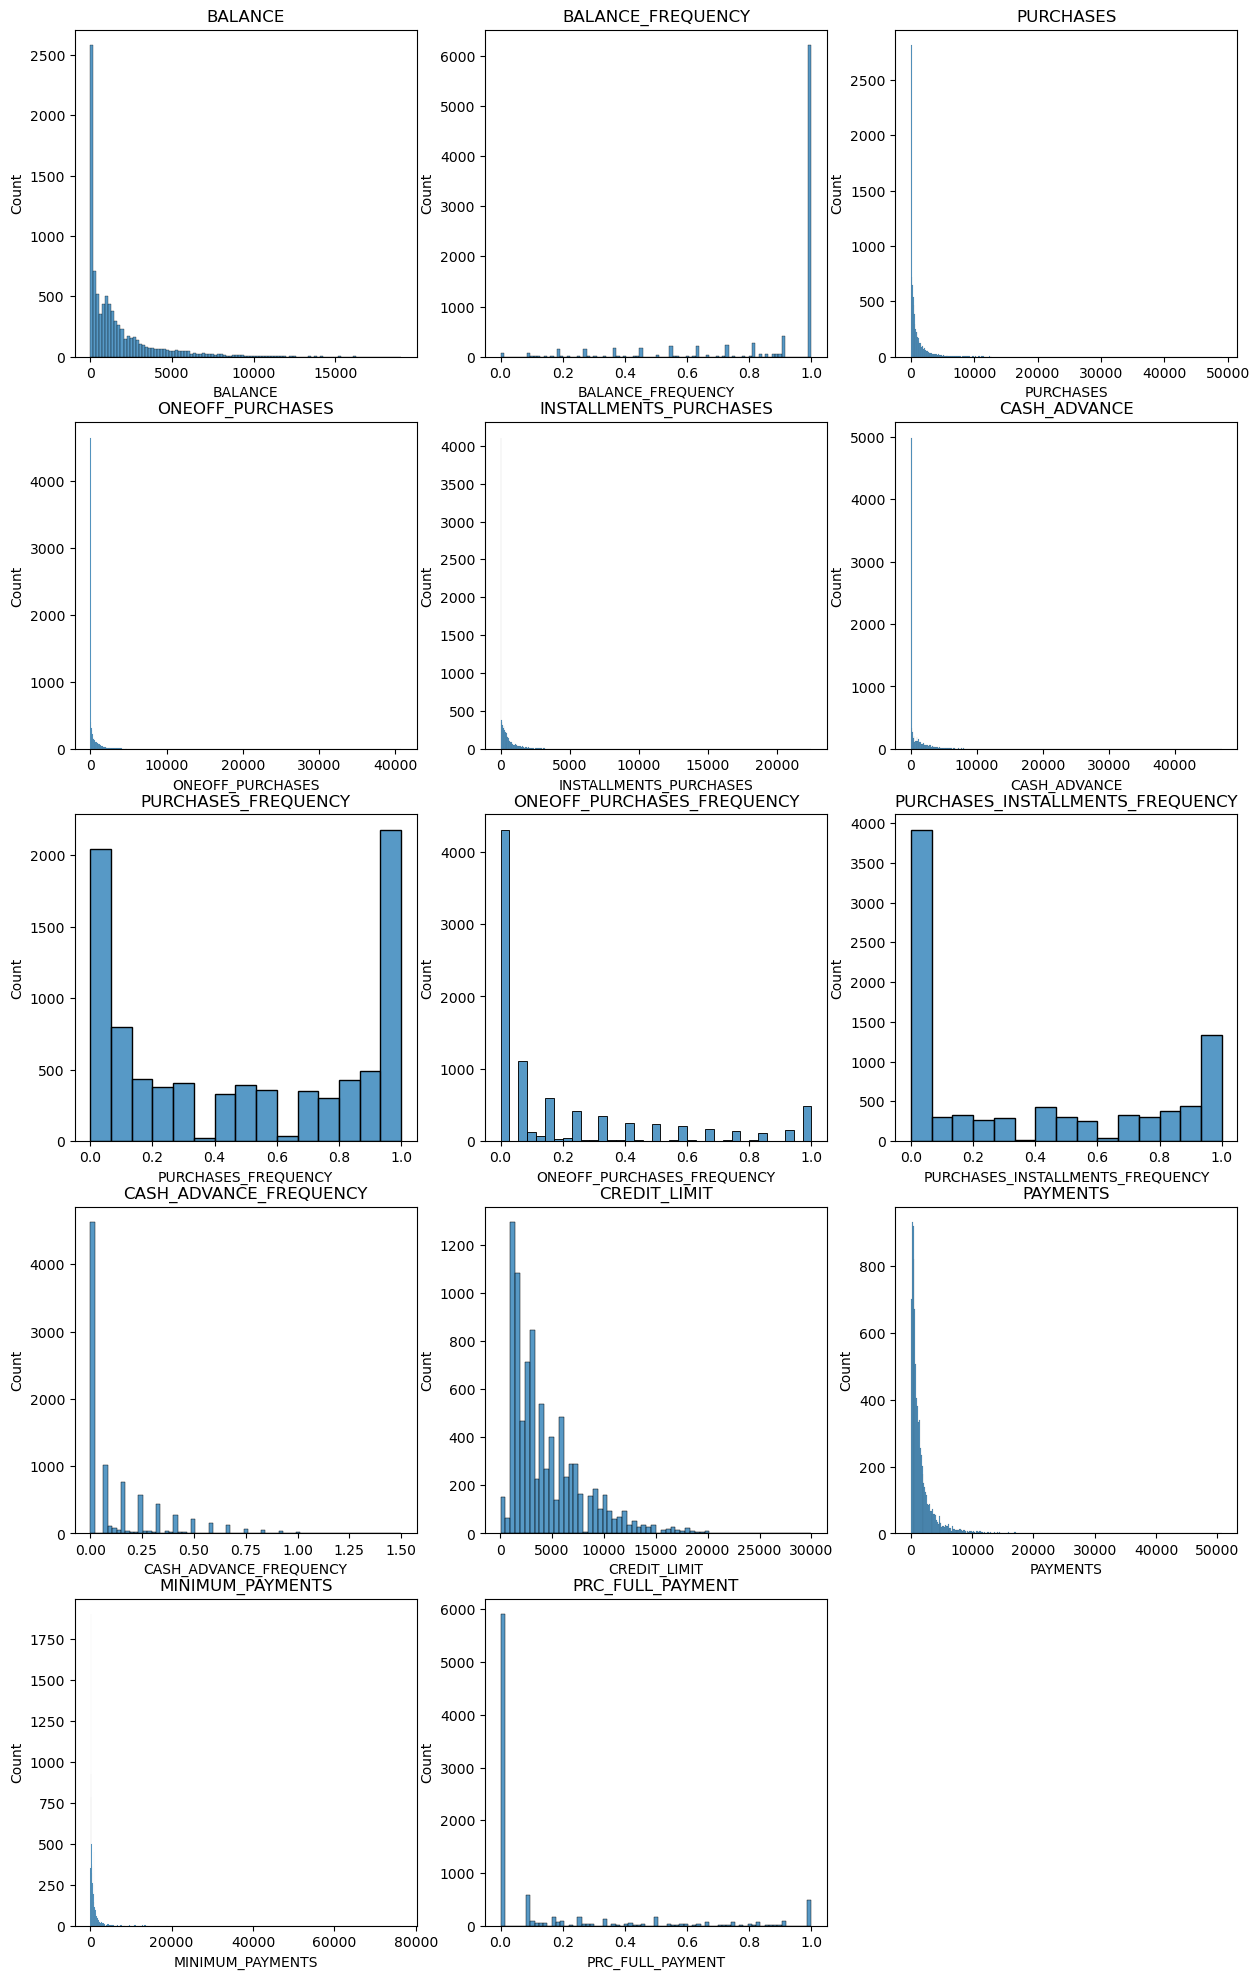

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.subplots(figsize=(15,45))
for i, column in enumerate(cols_float):
    plt.subplot(9,3,i+1)
    sns.histplot(data=df, x=column)
    plt.title(column)

C:\Users\user\AppData\Local\Temp\ipykernel_788\3780048903.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(9,3,i+1)


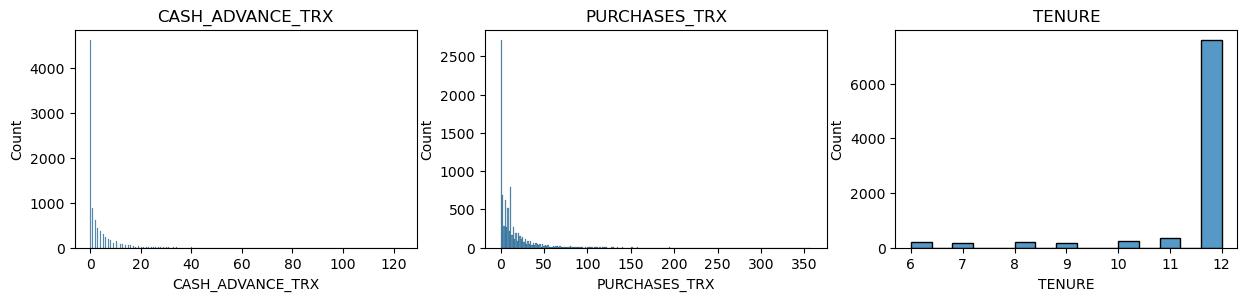

In [11]:
plt.subplots(figsize=(15,30))
for i, column in enumerate(cols_int):
    plt.subplot(9,3,i+1)
    sns.histplot(data=df, x=column)
    plt.title(column)

### from the above graphs, it is clear that the data is skewed. Hence, there is need for normalisation.

In [13]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [35]:
from sklearn.decomposition import PCA 
pca= PCA(n_components= 0.80) # this implies total of 80% variation 
reduced=pca.fit(df_scaled)
reduced= pca.transform(df_scaled)

In [41]:
reduced

array([[-1.68222028, -1.07645085],
       [-1.13829501,  2.50647569],
       [ 0.96968398, -0.38351993],
       ...,
       [-0.92620362, -1.81078554],
       [-2.33655162, -0.65796582],
       [-0.5564221 , -0.40046645]])

In [46]:
# KMeans algorithm for clustering
kmeans=KMeans(n_clusters=8)
kmeans_predict=kmeans.fit_predict(reduced)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [47]:
kmeans.inertia_

12308.138334544004

### lesser the inertia, better the model is.

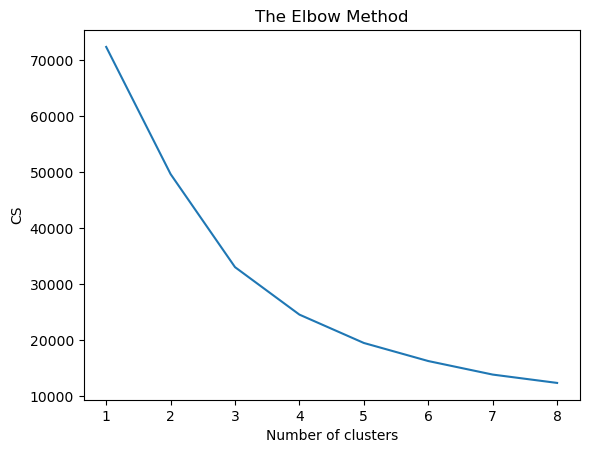

In [57]:
# Elbow Method to find optimal number of clusters
from sklearn.cluster import KMeans
cs = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(reduced)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 9), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

#### From the above plot, there is alight bend at n=3. Therefore, we can infer that the optimal number of clusters is 4
- we perform the kmeans fitting with n=3

In [58]:
kmeans=KMeans(n_clusters=3)
kmeans_predict=kmeans.fit_predict(reduced)



C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [59]:
unique,counts= np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique,counts)))

{0: 1648, 1: 6110, 2: 1192}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


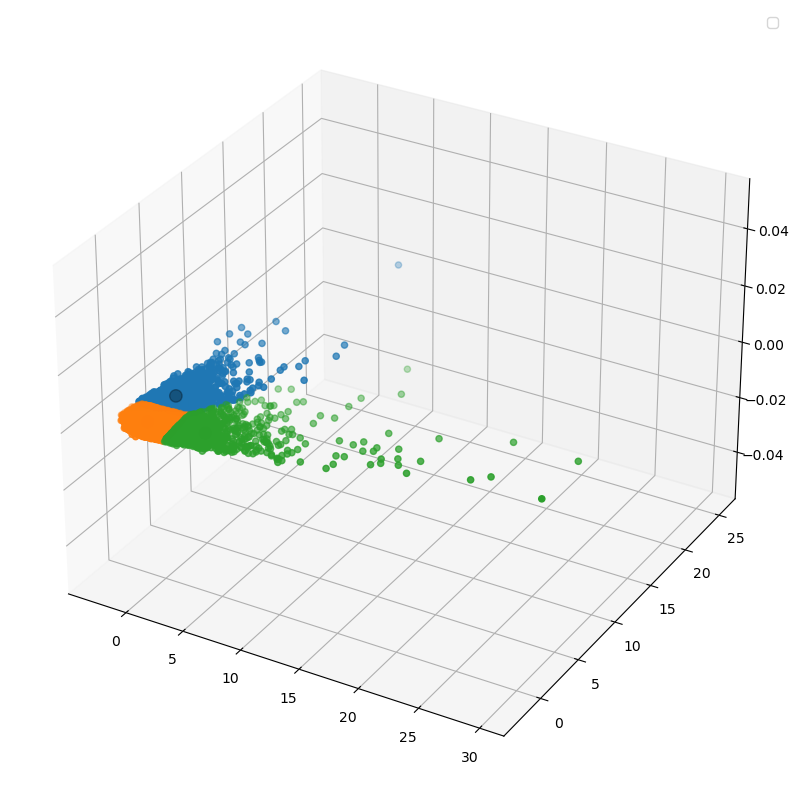

In [60]:
plt.figure(figsize=(10,15))
ax = plt.axes(projection ="3d")
centroids= kmeans.cluster_centers_
for i in unique:
    filtered_data = reduced[kmeans_predict==i]
    ax.scatter3D(filtered_data[:, 0] , filtered_data[:,1])
ax.scatter3D(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [61]:
# Gaussian Mixture algorithm
#It uses multiple Gaussian distributions to fit arbitrarily shaped data
from sklearn.mixture import GaussianMixture
gm= GaussianMixture(n_components=3, covariance_type = 'full', n_init=50, random_state=2)
gm_predict = gm.fit_predict(reduced)

In [62]:
unique,counts= np.unique(gm_predict, return_counts=True)
print(dict(zip(unique,counts)))

{0: 2761, 1: 1316, 2: 4873}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


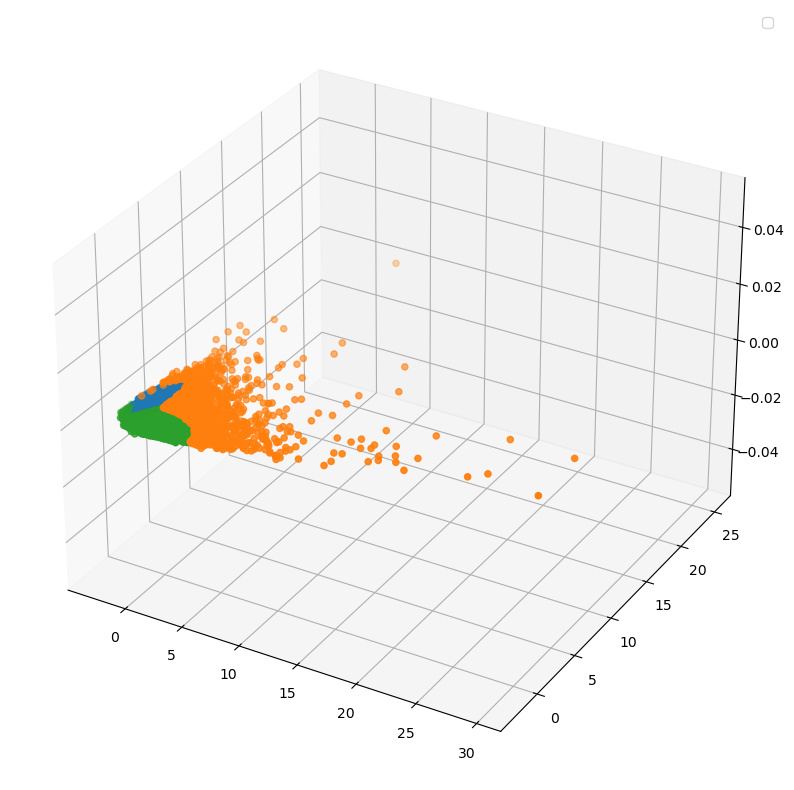

In [64]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection ="3d")
for i in unique:
    filtered_data = reduced[gm_predict==i]
    ax.scatter3D(filtered_data[:, 0] , filtered_data[:,1])

plt.legend()
plt.show()

In [65]:
kmeans_silhouette=metrics.silhouette_score(reduced,kmeans_predict, metric="euclidean")
kmeans_ch=metrics.davies_bouldin_score(reduced,kmeans_predict)
kmeans_db=metrics.calinski_harabasz_score(reduced,kmeans_predict)
gaussian_silhouette=metrics.silhouette_score(reduced,gm_predict, metric="euclidean")
gaussian_ch=metrics.davies_bouldin_score(reduced,gm_predict)
gaussian_db=metrics.calinski_harabasz_score(reduced,gm_predict)

In [66]:
data = [
    ['KMeans',kmeans_silhouette, kmeans_ch, kmeans_db], 
    ['Gaussian Mixture Model', gaussian_silhouette, gaussian_ch, gaussian_db]
       ]

result = pd.DataFrame(data, columns=['Model', 'Silhouette_Score', 'Calinski_Harabasz_Score', 'Davies_Bouldin_Index'])

result

,Model,Silhouette_Score,Calinski_Harabasz_Score,Davies_Bouldin_Index
0,KMeans,0.452172,0.811670,5337.520740
1,Gaussian Mixture Model,0.336808,1.113775,3505.874354


#### from the above table, it is clear that ch score(higher the value, better it is) and db (smaller the value, optimal the value is) favours Gaussian Mixture model while silhouette score favours kmeans clustering.